In [1]:
using HDF5
using Statistics
using Measurements

In [2]:
using Plots
gr(
    # show = :ijulia, # Dynamically updating plots
    key = false,
    fmt = :png,
    size = (640, 480)
)

Plots.GRBackend()

In [3]:
T(auxV; Tmax = 310.0, Tmin=0.0) = Tmin + (Tmax - Tmin) * (auxV / 10.0)

T (generic function with 1 method)

In [4]:
using Dates

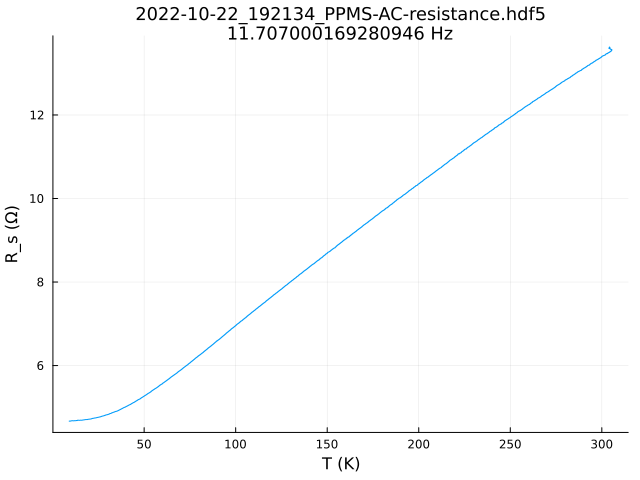

In [41]:
datadir = joinpath("Nowack_Lab_data", "2022-10-20_PPMS-slow-AC-resistance")

activeflag = true

layout = @layout [
    a{1.0w}
    b{1.0w}
    c{0.5w} d{0.5w}
]

latestdata = readdir(datadir)[end]
# latestdata = "2022-10-22_152630_PPMS-AC-resistance.hdf5"
datafile = joinpath(datadir, latestdata)
start_time = ""

# opening file in loop is perhaps sub-optimal, but works for now.
h5open(datafile, "r"; swmr=true) do f
    meta = attrs(f)
    
    t0 = f["/zurich/initial_timestamp"][]
    tb = f["/zurich/dev505/clockbase"][]
    Rb = f["/setup/bias_resistance"][]

    tV = f["/data/zurich/dev505/demods/0/sample/timestamp"][:]
    tI = f["/data/zurich/dev505/demods/1/sample/timestamp"][:]

    commontimes = intersect(tV, tI)
    iV = indexin(commontimes, tV)
    iI = indexin(commontimes, tI)
    ts = tV[iV] # .== tI[iI]

    Vx = f["/data/zurich/dev505/demods/0/sample/x"][:][iV]
    Vy = f["/data/zurich/dev505/demods/0/sample/y"][:][iV]
    Ix = f["/data/zurich/dev505/demods/1/sample/x"][:][iI]
    Iy = f["/data/zurich/dev505/demods/1/sample/y"][:][iI]

    aux0 = f["/data/zurich/dev505/demods/0/sample/auxin0"][:][iV]
    aux1 = f["/data/zurich/dev505/demods/0/sample/auxin1"][:][iV]

    tt = meta["start_time"]
    dt = DateTime(tt[1:19], ISODateTimeFormat) + Microsecond(parse(Int, tt[21:26]))
    t = (ts .- t0) ./ tb
    blipstart = DateTime("2022-10-21T16:05", ISODateTimeFormat) - dt
    blipend = DateTime("2022-10-21T16:06", ISODateTimeFormat) - dt
    
    A = 100.0 # SR560 gain
    G = 100.0 # V/A transimpedance gain
    R = (π / log(2)) .* (Vx ./ A) ./ (-Ix ./ G) # kΩ

    freq = f["/data/zurich/dev505/demods/0/sample/frequency"][end]
    title = join([latestdata, "$(freq) Hz"], "\n")
    # title = latestdata

    Ts = T.(aux0, Tmax=310.0)

    pRT = plot(Ts, R;
        xlabel = "T (K)",
        ylabel = "R_s (Ω)",
        plot_title = title,
        plot_titlefontsize = 12,
    )
end

In [42]:
savefig("bare-Nb-sheet-resistance-warming-roomtemp.png")

In [12]:
tt = "2022-10-21T15:05:42.637056 ± 80466 μs"

"2022-10-21T15:05:42.637056 ± 80466 μs"

In [20]:
using Dates

In [43]:
dt = DateTime(tt[1:19], ISODateTimeFormat) + Microsecond(parse(Int, tt[21:26]))

2022-10-21T15:05:42.637

In [53]:
blipstart = DateTime("2022-10-21T16:05", ISODateTimeFormat) - dt
blipend = DateTime("2022-10-21T16:06", ISODateTimeFormat) - dt

3617363 milliseconds